<h1> Ensemble Techniques - Parkinsons Disesase Screening </h1>

<h3> OVERVIEW/CONTEXT: </h3>
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician

<h3> ABOUT THE DATA: </h3>

<h4>SOURCE: </h4>
The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals. The original study published the feature extraction methods for general voice disorders.

<h4>DATASET INFORMATION: </h4>
This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an 
instance corresponding to one voice recording. There are around six 
recordings per patient, the name of the patient is identified in the first column.For further information or to pass on comments, please contact Max Little (littlem '@' robots.ox.ac.uk).

<h4>ATTRIBUTE INFORMATION: </h4>
<ol> 
     <li> name	Subject Name and recordign number</li>
     <li> MDVP:F0 (Hz)	Average vocal fundamental frequency </li>
     <li> MDVP:Fhi (Hz)	Maximum vocal fundamental frequency</li>
     <li> MDVP:Flo (Hz)	Minimum vocal fundamental frequency</li>
     <li> MDVP:Jitter(%)	MDVP jitter in percentage</li>
     <li> MDVP:Jitter(Abs)	MDVP absolute jitter in ms</li>
     <li> MDVP:RAP	MDVP relative amplitude perturbation</li>
     <li> MDVP:PPQ	MDVP five-point period perturbation quotient</li>
     <li> Jitter:DDP	Average absolute difference of differences between jitter cycles</li>
     <li> MDVP:Shimmer	MDVP local shimmer</li>
     <li> MDVP:Shimmer(dB)	MDVP local shimmer in dB</li>
     <li> Shimmer:APQ3	Three-point amplitude perturbation quotient</li>
     <li> Shimmer:APQ5	Five-point amplitude perturbation quotient</li>
     <li> MDVP:APQ11	MDVP 11-point amplitude perturbation quotient</li>
     <li> Shimmer:DDA	Average absolute differences between the amplitudes of consecutive periods</li>
     <li> NHR	Noise-to-harmonics ratio</li>
     <li> HNR	Harmonics-to-noise ratio</li>
     <li> RPDE	Recurrence period density entropy measure</li>
     <li> D2	Correlation dimension</li>
     <li> DFA	Signal fractal scaling exponent of detrended fluctuation analysis</li>
     <li> Spread1	Two nonlinear measures of fundamental</li>
     <li> Spread2	Frequency variation</li>
     <li> PPE	Pitch period entropy </li>
    </ol>

<h3> OBJECTIVE </h3>
Goal is to classify the patients into the respective labels using the attributes from their voice recordings to help and identify Parkinson's affected from Healthy people.
<ol> 
    <li> Load and Visualize the data </li>
    <li> Conduct an Exploratory Data Analysis </li>
    <li> Preparing the data to train a model </li>
    <li> Training/Predicting using classification models and observing accuracy </li>
    <li> Train a Metaclassifier and observe accuracy on data </li>
    <li> Train one Ensemble model and note accuracy </li>
    <li> Compare all models and pick the best</li>
</ol> 

<h3> 1. IMPORT THE NECESSARY LIBRARIES </h3>

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import nltk
import sklearn
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from scipy import stats
from scipy.stats import zscore
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

<h3> 2. LOAD THE DATA SET</h3>
<li> Import the dataset and read into a dataframe </li>

In [3]:
parkinson_df=pd.read_csv('Data - Parkinsons')

<h3> 3. EYEBALL THE RAW DATA </h3>
We will review the dataset for dimension, column description and ensure that all attributes are understood well.
<li> Rename the dataframe columns to facilitate easy reference and access.  </li>
<li> Check dimensions (shape) of data </li>
<li> Check Information about the data and  datatypes of the  respective attributes.</li>
<li> Check for missing values in the dataset. </li>
<li> Check for negative values in the dataset. </li>
<li> Check for duplicate values in the dataset. </li>
<li> Review the Target value distribution</li>
<li> Review the 5-point summary</li>
<li> Review the Variable Categories and Data Types. </li>
<li> Conclude raw data analysis with a Profile Report</li>

<h5> Rename the dataframe columns </h5>

In [4]:
parkinson_df.rename(columns = {'MDVP:Fo(Hz)' :'Fo', 
                               'MDVP:Fhi(Hz)':'Fhi',
                               'MDVP:Flo(Hz)': 'Flo',
                               'MDVP:Jitter(%)':'JitterPer',
                               'MDVP:Jitter(Abs)':'JitterAbs',
                               'MDVP:RAP':'RAP',
                               'MDVP:PPQ':'PPQ',
                               'Jitter:DDP': 'DDP',
                               'MDVP:Shimmer': 'Shimmer',
                               'MDVP:Shimmer(dB)': 'ShimmerdB',
                               'Shimmer:APQ3': 'APQ3',
                               'Shimmer:APQ5': 'APQ5',
                               'MDVP:APQ': 'APQ',
                               'Shimmer:DDA': 'DDA',
                              }, inplace = True)

In [5]:
pd.set_option('display.max_columns', 25)
parkinson_df.head().T

,0,1,2,3,4
name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5
Fo,119.992,122.4,116.682,116.676,116.014
Fhi,157.302,148.65,131.111,137.871,141.781
Flo,74.997,113.819,111.555,111.366,110.655
JitterPer,0.00784,0.00968,0.0105,0.00997,0.01284
JitterAbs,7e-05,8e-05,9e-05,9e-05,0.00011
RAP,0.0037,0.00465,0.00544,0.00502,0.00655
PPQ,0.00554,0.00696,0.00781,0.00698,0.00908
DDP,0.01109,0.01394,0.01633,0.01505,0.01966
Shimmer,0.04374,0.06134,0.05233,0.05492,0.06425


<h5> Shape of Data </h5>

In [6]:
parkinson_df.shape # see the shape of the data

(195, 24)

<h5> Summary of the Dataset </h5>

In [7]:
parkinson_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       195 non-null    object 
 1   Fo         195 non-null    float64
 2   Fhi        195 non-null    float64
 3   Flo        195 non-null    float64
 4   JitterPer  195 non-null    float64
 5   JitterAbs  195 non-null    float64
 6   RAP        195 non-null    float64
 7   PPQ        195 non-null    float64
 8   DDP        195 non-null    float64
 9   Shimmer    195 non-null    float64
 10  ShimmerdB  195 non-null    float64
 11  APQ3       195 non-null    float64
 12  APQ5       195 non-null    float64
 13  APQ        195 non-null    float64
 14  DDA        195 non-null    float64
 15  NHR        195 non-null    float64
 16  HNR        195 non-null    float64
 17  status     195 non-null    int64  
 18  RPDE       195 non-null    float64
 19  DFA        195 non-null    float64
 20  spread1   

<h5> Check for missing values in the dataset </h5>

In [8]:
parkinson_df.isna().apply(pd.value_counts)   #null value check

,name,Fo,Fhi,Flo,JitterPer,JitterAbs,RAP,PPQ,DDP,Shimmer,ShimmerdB,APQ3,APQ5,APQ,DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
False,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195


<h5> Check for negative values in the dataset </h5>

In [9]:
## A quick check for any negative values in the dataset
parkinson_df.iloc[:,1:].lt(0).sum()

Fo             0
Fhi            0
Flo            0
JitterPer      0
JitterAbs      0
RAP            0
PPQ            0
DDP            0
Shimmer        0
ShimmerdB      0
APQ3           0
APQ5           0
APQ            0
DDA            0
NHR            0
HNR            0
status         0
RPDE           0
DFA            0
spread1      195
spread2        0
D2             0
PPE            0
dtype: int64

<h5> Check for duplicate rows in the dataset </h5>

In [10]:
duplicateDFRow = parkinson_df[parkinson_df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateDFRow)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [name, Fo, Fhi, Flo, JitterPer, JitterAbs, RAP, PPQ, DDP, Shimmer, ShimmerdB, APQ3, APQ5, APQ, DDA, NHR, HNR, status, RPDE, DFA, spread1, spread2, D2, PPE]
Index: []


<h5> Check for Target value distribution </h5>

In [11]:
parkinson_df.status = parkinson_df.status.astype('category')
parkinson_df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

<h5> Check for 5-point Summary </h5>

In [12]:
parkinson_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fo,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
Fhi,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
Flo,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
JitterPer,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
JitterAbs,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
ShimmerdB,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


<H4> Profile Report (Observations) </H4>
<li> The Parkinson's data is a multivariate data set.</li>
<li> There are 195 Observations/Rows and 24 Voice Attributes/Columns for 31 people</li>
<li> The dataset contains 148 PD observations and 47 Jealthy Observations </li>
<li> There are no missing values in the dataset </li>
<li> Fundamental frequency variation "Spread1" has 195 negative values </li>
<li> There are no duplicate rows in the dataset </li>
<li> The dataset contains: 22 Numerical variables</li> 
<li> The dataset contains: 1 Categorical variable 'Status' : '1', '0'</li> 
<li> The target values for feature 'Status' is highly imbalanced. Data contains larger set of people with Parkinsons and a smaller set of people without Parkinsons.</li> 
<li> The dataset contains: 1 Categorical variable 'Status' : '1', '0'</li>
<li> Looking at the Mean value across all the features in the 5-point summary, the scale of some of the attributes are largely different from each other:</li>
    <ol> <li> Avg, Minimum and Maximum Vocal Fundamental Frequencies - Fo, Fhi, Flo. </li> 
        <li> Harmonic-to-Noise (HNR) Ratio - HNR. </li>
        <li> Fundamental Frequency Variation - Spread1. </li>
        <li> Dynamic Complexity Measure - D2. </li>    
    </ol> We will need to perform Feature Scaling for the above attributes

<h3> 4. UNIVARIATE ANALYSIS (Study of Data distribution of Each Attribute)  </h4>

We will study the data distribution of each attribute of the Numerical and Categorical type discussed above to summarize and find their patterns in the dataset

array([[<AxesSubplot:title={'center':'APQ'}>,
        <AxesSubplot:title={'center':'APQ3'}>,
        <AxesSubplot:title={'center':'APQ5'}>,
        <AxesSubplot:title={'center':'D2'}>,
        <AxesSubplot:title={'center':'DDA'}>],
       [<AxesSubplot:title={'center':'DDP'}>,
        <AxesSubplot:title={'center':'DFA'}>,
        <AxesSubplot:title={'center':'Fhi'}>,
        <AxesSubplot:title={'center':'Flo'}>,
        <AxesSubplot:title={'center':'Fo'}>],
       [<AxesSubplot:title={'center':'HNR'}>,
        <AxesSubplot:title={'center':'JitterAbs'}>,
        <AxesSubplot:title={'center':'JitterPer'}>,
        <AxesSubplot:title={'center':'NHR'}>,
        <AxesSubplot:title={'center':'PPE'}>],
       [<AxesSubplot:title={'center':'PPQ'}>,
        <AxesSubplot:title={'center':'RAP'}>,
        <AxesSubplot:title={'center':'RPDE'}>,
        <AxesSubplot:title={'center':'Shimmer'}>,
        <AxesSubplot:title={'center':'ShimmerdB'}>],
       [<AxesSubplot:title={'center':'spread1'}>,
   

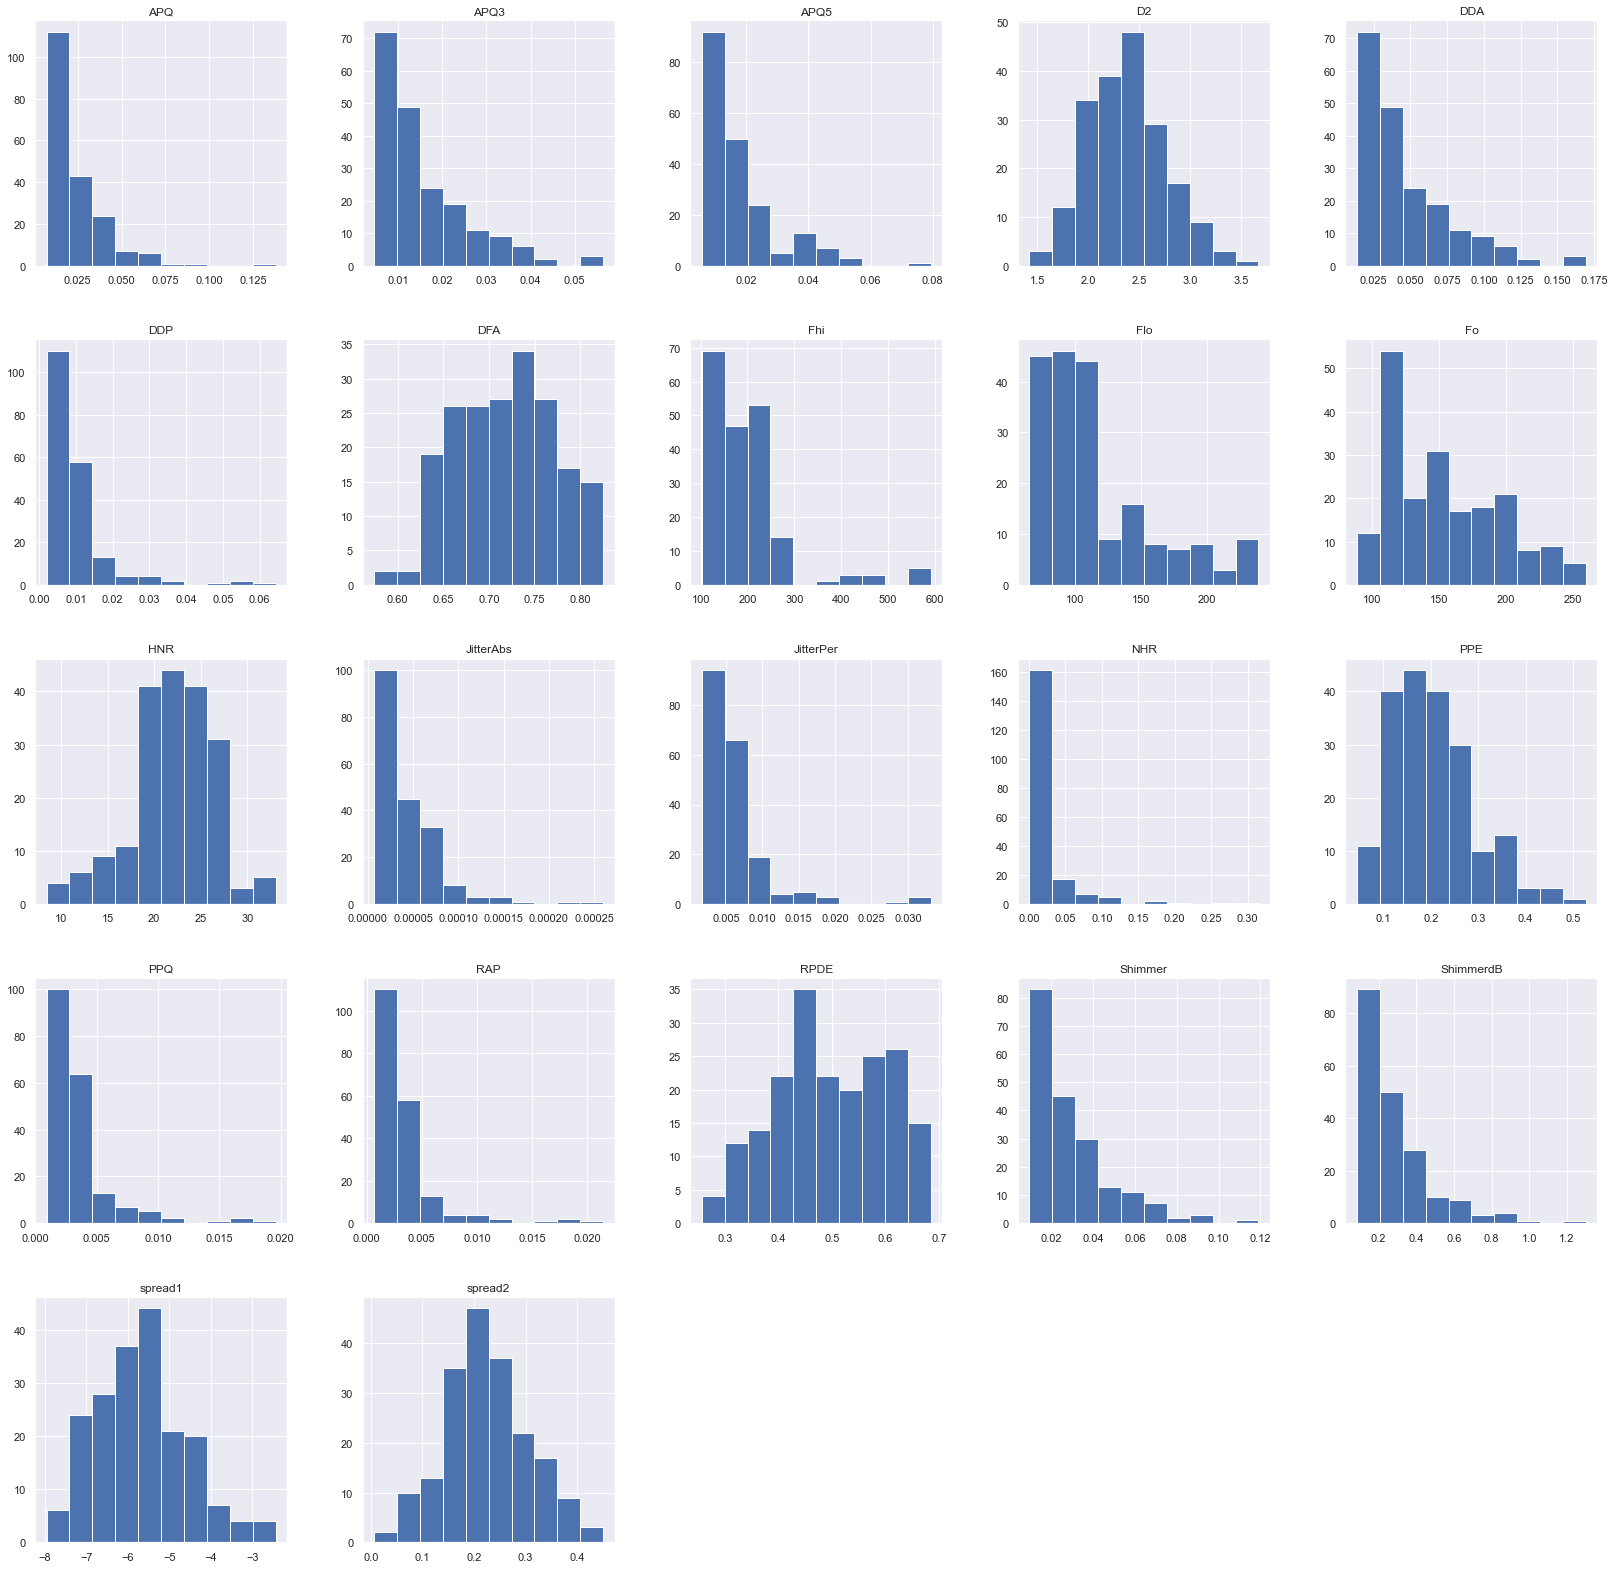

In [13]:
parkinson_df.hist(figsize=(28,28))

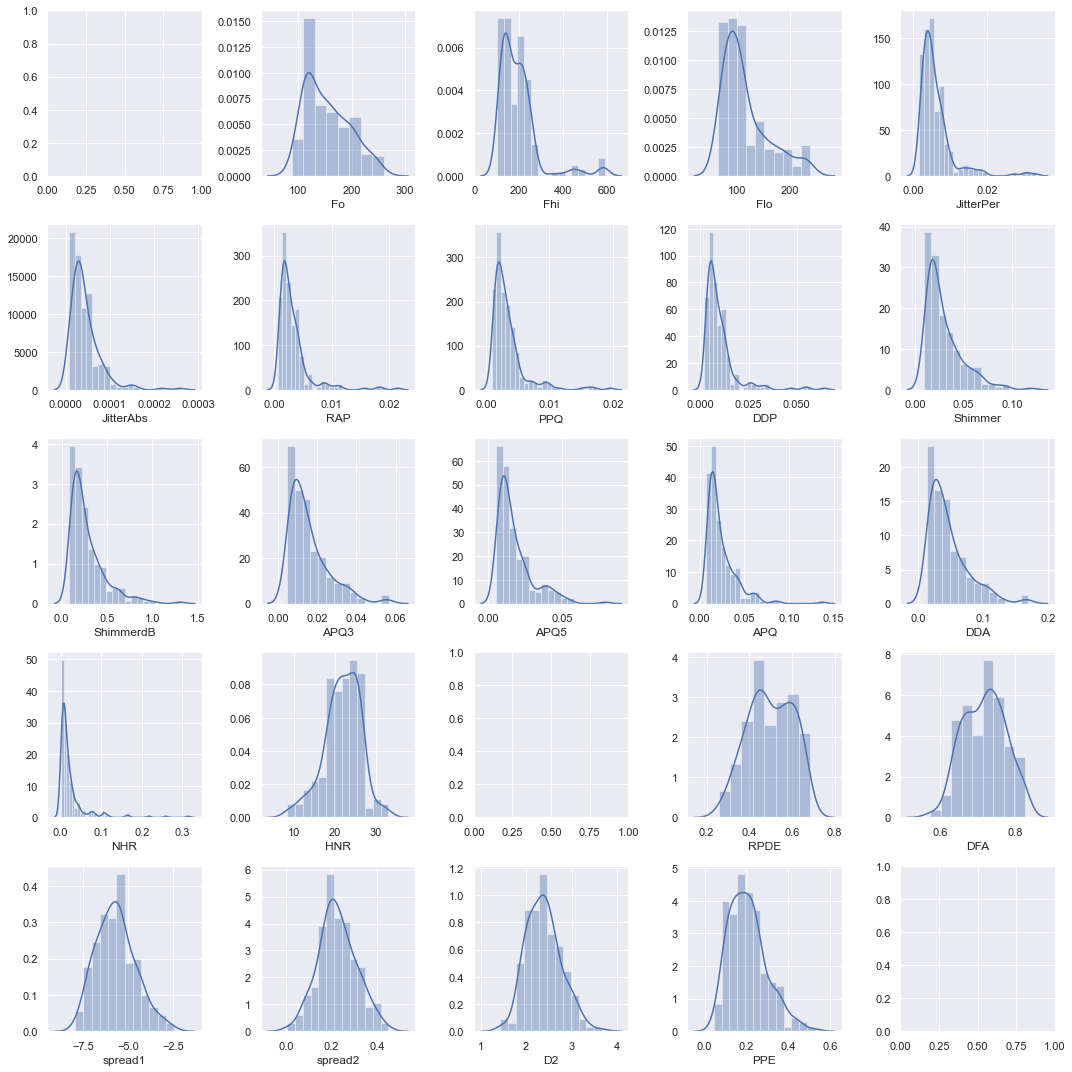

In [14]:
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for j in range(1,len(parkinson_df.columns)):
    col = parkinson_df.columns.values[j]
    # print (col)
    
    if col == "status":
        #print(col.replace(col,"Error"))
           pass
       
    else:
            sns.distplot(parkinson_df.iloc[:,j], ax=axes[j], hist=True, kde=True)
     
plt.tight_layout()
plt.show()

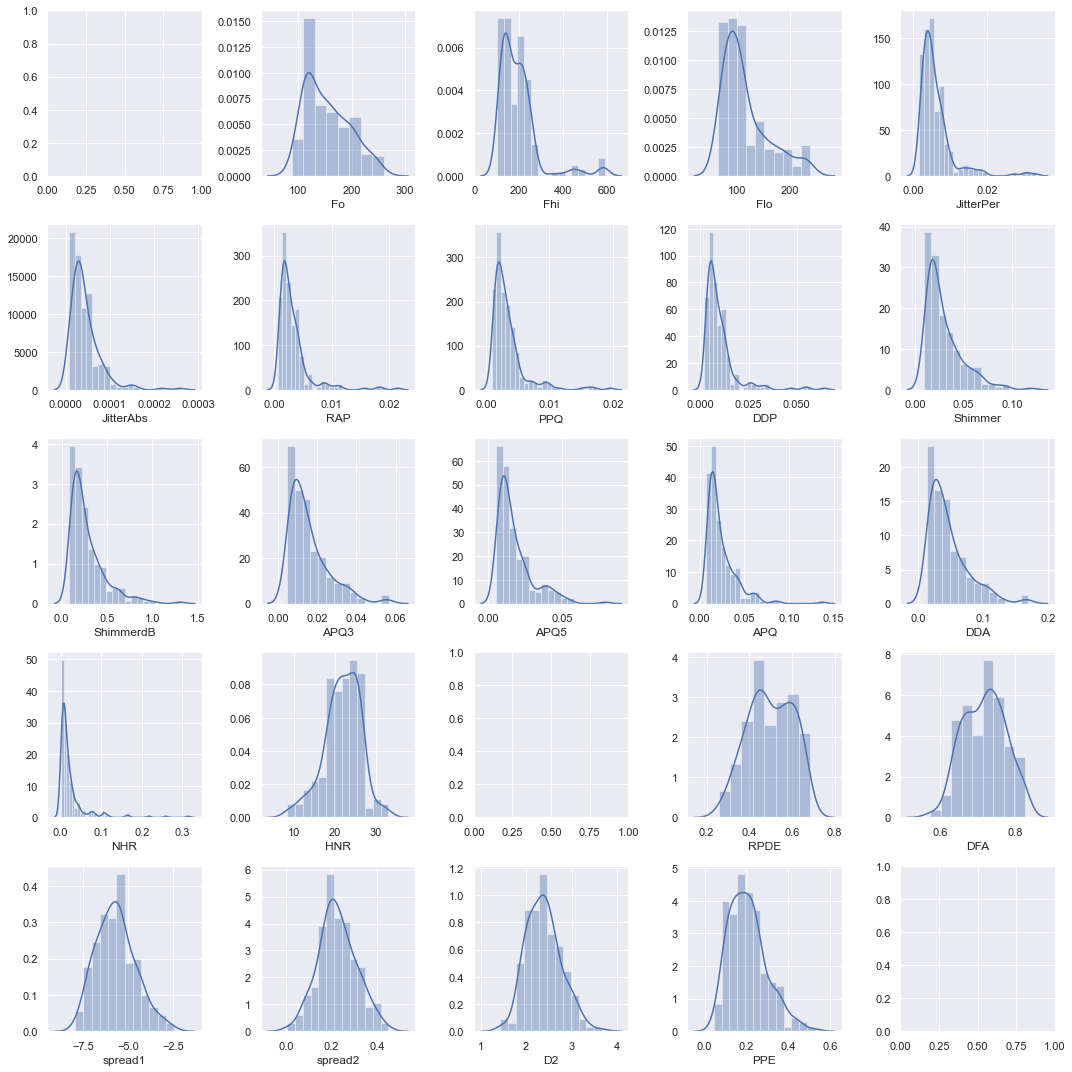

In [15]:
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for j in range(1,len(parkinson_df.columns)):
    col = parkinson_df.columns.values[j]
    # print (col)
    
    if col == "status":
        #print(col.replace(col,"Error"))
           pass
       
    else:
            sns.distplot(parkinson_df.iloc[:,j], ax=axes[j], hist=True, kde=True)
     
plt.tight_layout()
plt.show()

In [16]:
# Skewness masure for all the Attributes
parkinson_df.skew()

Fo           0.591737
Fhi          2.542146
Flo          1.217350
JitterPer    3.084946
JitterAbs    2.649071
RAP          3.360708
PPQ          3.073892
DDP          3.362058
Shimmer      1.666480
ShimmerdB    1.999389
APQ3         1.580576
APQ5         1.798697
APQ          2.618047
DDA          1.580618
NHR          4.220709
HNR         -0.514317
status      -1.187727
RPDE        -0.143402
DFA         -0.033214
spread1      0.432139
spread2      0.144430
D2           0.430384
PPE          0.797491
dtype: float64

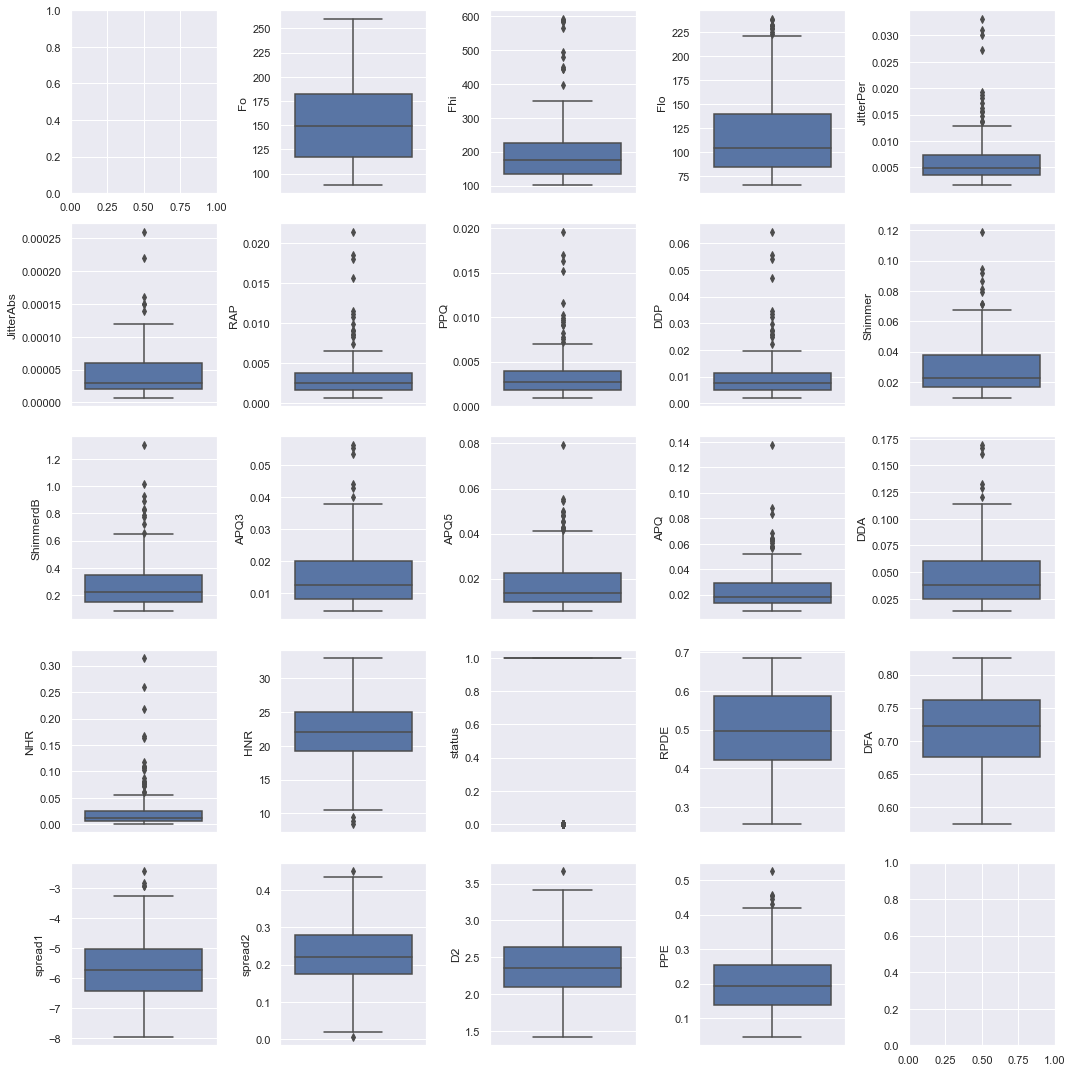

In [17]:
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for j in range(1,len(parkinson_df.columns)):
    sns.boxplot(y=parkinson_df.iloc[:,j],data=parkinson_df, orient='v',ax=axes[j])
plt.tight_layout()
plt.show()

In [18]:
numeric_col = parkinson_df.select_dtypes(include=[np.number]).columns
parkinson1_df = parkinson_df[numeric_col].apply(zscore)
abs(parkinson1_df > 3).apply(pd.value_counts)

,Fo,Fhi,Flo,JitterPer,JitterAbs,RAP,PPQ,DDP,Shimmer,ShimmerdB,APQ3,APQ5,APQ,DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
False,195.0,188,195.0,191,190,191,191,191,191,191,192,192,192,192,190,195.0,195.0,195.0,195.0,195.0,194,194
True,NaN,7,NaN,4,5,4,4,4,4,4,3,3,3,3,5,NaN,NaN,NaN,NaN,NaN,1,1


<h3> Univariate Anlaysis Summary</h3>
From the **Distribution plots** for the Univariates and **Skewness** measure it is clear that the following features are highly Right skewed since they are greater than one ( >1 ).
<li> Maximum and Minimum Fundamental Frequency - MDVP:Fhi, MDVP:Flo</li>
<li> Absolute and Percentage Jitters - MDVP:Jitter(%), MDVP:Jitter(Abs)</li>
<li> Fundamental Frequency Measures MDVP:RAP, MDVP:PPQ, Jitter DDP </li>
<li> All Shimmer attributes - Shimmer(DB), APQ3, APQ5, APQ, DDA Measures MDVP:RAP, MDVP:PPQ, Jitter DDP </li>
<li> Noise-to-Harmonic Ratio - NHR </li>

Skewness casts a disproprtionate influence on parameter estimates and confidence intervals. We will have to treat such attributes before building a model.    

From the **Box Plot** for the Univariates and **z-score** calculation, we find that many Voice features have Outliers. We will try to normalize the data distribution once we have identified the relevant attributes for the ML model after correlation analysis.

<h3> 5. BIVARIATE ANALYSIS (Study of Each Attribute's relationship with Status)  </h4>

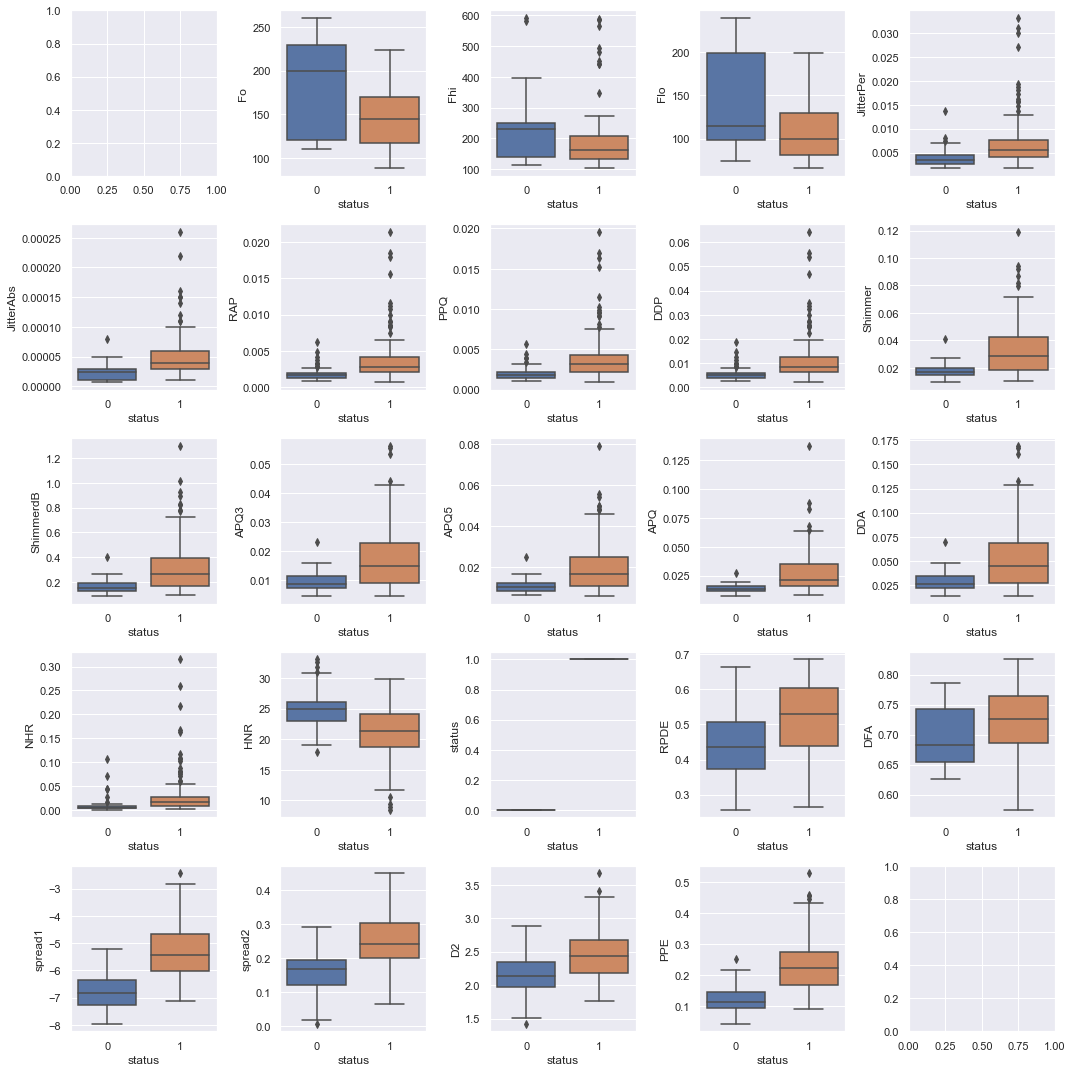

In [19]:
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for j in range(1,len(parkinson_df.columns)):
    sns.boxplot(x='status', y=parkinson_df.iloc[:,j],data=parkinson_df, orient='v',ax=axes[j])
plt.tight_layout()
plt.show()

In [20]:
parkinson_df.groupby("status").mean().T

status,0,1
Fo,181.937771,145.180762
Fhi,223.636750,188.441463
Flo,145.207292,106.893558
JitterPer,0.003866,0.006989
JitterAbs,0.000023,0.000051
RAP,0.001925,0.003757
PPQ,0.002056,0.003900
DDP,0.005776,0.011273
Shimmer,0.017615,0.033658
ShimmerdB,0.162958,0.321204


<h4>Bivariate Analysis Summary </h4>
From the above Box plots of Continuous Independent Variables with the Target variable and Mean Caculations, we can conclude that:
<ol>
    <li> Mean of all vocal fundamental frequencies 
        <ol> <li>MDVP:Fo(Hz) </li>
         <li>MDVP:Fhi(Hz) </li>
         <li>MDVP:Flo(Hz) </li> 
        </ol>   
            are lower for people with Parkinsons Disease than in Healthy people.
    <li> Mean of Harmonic-to-Noise Ratio is also lower for people with Parkinson's Disease than in Healthy people. </li>
    <li> All other voice measurement Mean values for Parkinson's Disease people are higher than in Healthy people. </li>
</ol>  


<h3> 6. CORRELATION ANALYSIS (Study of All Variabale and their Relationships)  </h3>

<AxesSubplot:>

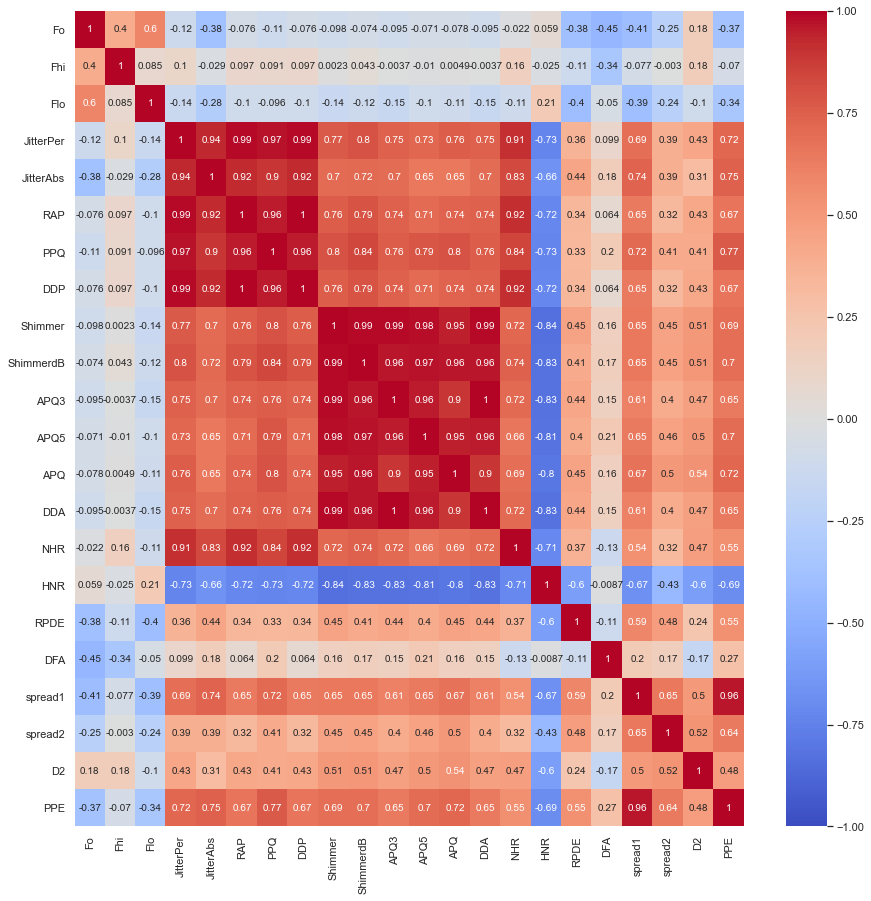

In [21]:
# Correlation with heat map
corr = parkinson_df.drop(['name', 'status'], axis = 1).corr()
plt.figure(figsize = (15,15))
sns.heatmap(parkinson_df.corr(), annot = True, vmin = -1, vmax = 1, center = 0, cmap="coolwarm")

In [22]:
parkinson_df.corr()

,Fo,Fhi,Flo,JitterPer,JitterAbs,RAP,PPQ,DDP,Shimmer,ShimmerdB,APQ3,APQ5,APQ,DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
Fo,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
Fhi,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
Flo,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
JitterPer,-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
JitterAbs,-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
ShimmerdB,-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


<AxesSubplot:>

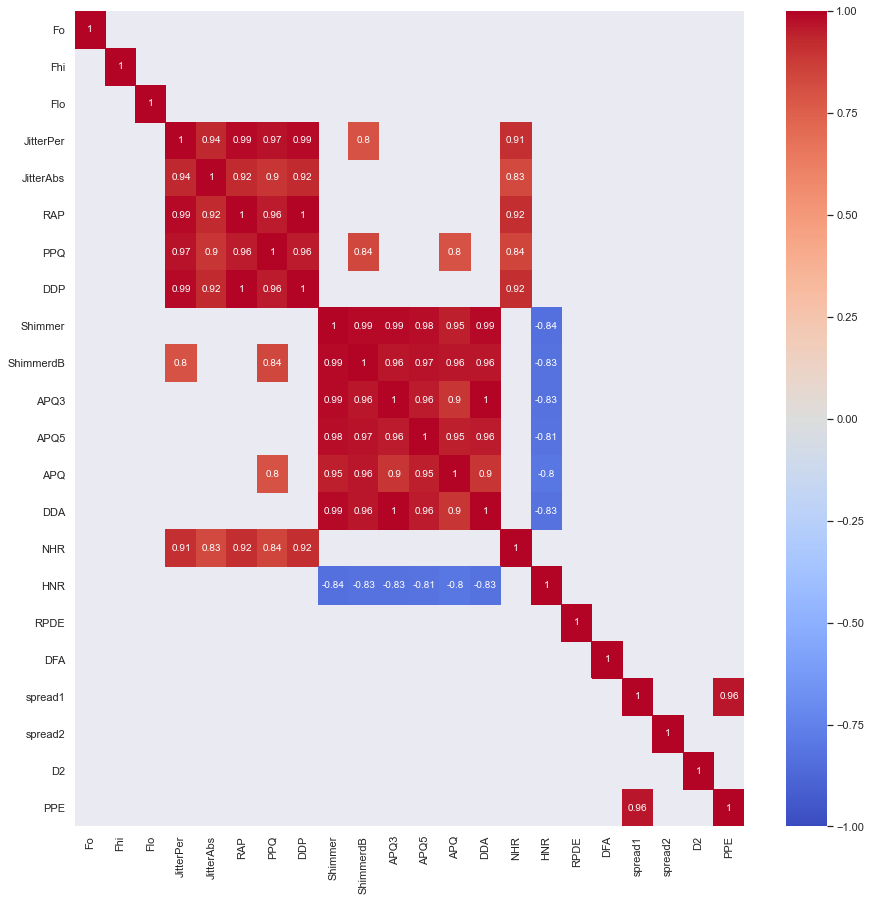

In [23]:
#Correlation with Heatmap after masking coefficieints < .8 
corr_pos = corr.abs()
mask = (corr_pos < 0.8 ) 
fig, ax = plt.subplots(figsize = [15,15])
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, center = 0, mask = mask, cmap="coolwarm")

<h4> Correlation Analysis Summary </h4> 
From the above Heatmap Correlation analysis we can conclude that
<ol>
    <li> All the measures of Variation in Fundamental Frequencies are very strongly correlated to NHR and moderately and negatively correlated to HNR. 
        <ol>
            <li> MDVP:Jitter(%) </li>
            <li> MDVP:Jitter(Abs) </li> 
            <li> MDVP:RAP </li> 
            <li> MDVP :PPQ </li> 
            <li> Jitter:DDP </li>  
        </ol> </li>
    <li> All the measures of Variation in Amplitude are very strongly and negatively correlated to HNR and moderately correlated to NHR.
        <ol>
            <li> MDVP:Shimmer (%) </li>
            <li> MDVP:Shimmer(dB) </li> 
            <li> Shimmer:APQ3 </li> 
            <li> Shimmer:APQ5 </li> 
            <li> MDVP:APQ </li>  
            <li> Shimmer:DDA </li>
         </ol> </li>
          are positively and highly correlated to HNR. </li>
    <li> Spread1 and PPE are positively and highly correlated with each other. </li>
    <li> All the measures of Variation in Fundamental Frequencies are highly correlated to each other. </li>
    <li> All the measures of Variation in Amplitude are highly correlated to each other. </li>
</ol>
    

<h3> 7. PREPARE THE DATA </h3>
We will need to preprocess the data to:
<li> Select only those features and remove the highly correlated ones for ML modeling. </li>
<li> Remove the Outliers </li>
<li> Scale and Normalize the Attributes since each is on a different scale. </li>
    

<h5> Feature Selection for Correlation </h5>

In [24]:
# Identify Highly Correlated Features programmatically
# Create correlation matrix
parkinson_1_df = parkinson_df.drop(['name'], axis=1)
corr_matrix = parkinson_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

['JitterAbs',
 'RAP',
 'PPQ',
 'DDP',
 'ShimmerdB',
 'APQ3',
 'APQ5',
 'APQ',
 'DDA',
 'NHR',
 'HNR',
 'PPE']

In [25]:
# Drop the Highly Correlated Features
parkinson_2_df = parkinson_1_df.drop(parkinson_df[to_drop], axis=1)
parkinson_2_df.shape

(195, 11)

<h5> Outlier Treatment </h5>

In [26]:
numeric_col = parkinson_2_df.select_dtypes(include=[np.number]).columns
parkinson_3_df = parkinson_2_df[numeric_col].apply(zscore)
abs(parkinson_3_df > 3).apply(pd.value_counts)

,Fo,Fhi,Flo,JitterPer,Shimmer,RPDE,DFA,spread1,spread2,D2
False,195.0,188,195.0,191,191,195.0,195.0,195.0,195.0,194
True,NaN,7,NaN,4,4,NaN,NaN,NaN,NaN,1


In [27]:
cols = list(parkinson_2_df.columns)
#cols = list(parkinson_2_df[['Fhi', 'Jitter-Per','Shimmer', 'D2']])
cols.remove('status')
parkinson_2_df[cols]
for col in cols:
    col_zscore = col + '_zscore'
 #   col_outlier = col + '_outlier'                       
    parkinson_2_df[col_zscore] = (parkinson_2_df[col] - parkinson_2_df[col].mean())/parkinson_2_df[col].std(ddof=0)
  #  parkinson_2_df[col_outlier] = (abs(df[col_zscore])>3).astype(int)
parkinson_2_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,...,183,184,185,186,187,188,189,190,191,192,193,194
Fo,119.992,122.4,116.682,116.676,116.014,120.552,120.267,107.332,95.73,95.056,88.333,91.904,...,117.226,116.848,116.286,116.556,116.342,114.563,201.774,174.188,209.516,174.688,198.764,214.289
Fhi,157.302,148.65,131.111,137.871,141.781,131.162,137.244,113.84,132.068,120.103,112.24,115.871,...,123.925,217.552,177.291,592.03,581.289,119.167,262.707,230.978,253.017,240.005,396.961,260.277
Flo,74.997,113.819,111.555,111.366,110.655,113.787,114.82,104.315,91.754,91.226,84.072,86.292,...,106.656,99.503,96.983,86.228,94.246,86.647,78.228,94.261,89.488,74.287,74.904,77.973
JitterPer,0.00784,0.00968,0.0105,0.00997,0.01284,0.00968,0.00333,0.0029,0.00551,0.00532,0.00505,0.0054,...,0.00417,0.00531,0.00314,0.00496,0.00267,0.00327,0.00694,0.00459,0.00564,0.0136,0.0074,0.00567
Shimmer,0.04374,0.06134,0.05233,0.05492,0.06425,0.04701,0.01608,0.01567,0.02093,0.02838,0.02143,0.02752,...,0.01909,0.01795,0.01564,0.0166,0.013,0.01185,0.02574,0.04087,0.02751,0.02308,0.02296,0.01884
status,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0
RPDE,0.414783,0.458359,0.429895,0.434969,0.417356,0.415564,0.59604,0.63742,0.615551,0.547037,0.611137,0.58339,...,0.603515,0.663842,0.598515,0.566424,0.528485,0.555303,0.508479,0.448439,0.431674,0.407567,0.451221,0.462803
DFA,0.815285,0.819521,0.825288,0.819235,0.823484,0.825069,0.764112,0.763262,0.773587,0.798463,0.776156,0.79252,...,0.669565,0.656516,0.654331,0.667654,0.663884,0.659132,0.683761,0.657899,0.683244,0.655683,0.643956,0.664357
spread1,-4.81303,-4.07519,-4.44318,-4.1175,-3.74779,-4.24287,-5.63432,-6.1676,-5.49868,-5.01188,-5.24977,-4.96023,...,-5.61907,-5.19886,-5.59258,-6.43112,-6.35902,-6.71022,-6.93447,-6.53859,-6.19533,-6.7872,-6.74458,-5.72406
spread2,0.266482,0.33559,0.311173,0.334147,0.234513,0.299111,0.257682,0.183721,0.327769,0.325996,0.391002,0.363566,...,0.191576,0.206768,0.133917,0.15331,0.116636,0.149694,0.15989,0.121952,0.129303,0.158453,0.207454,0.190667


In [28]:
cols = list(parkinson_2_df[['Fhi', 'JitterPer','Shimmer', 'D2']])
for col in cols:
    col_outlier = col + '_outlier'
    col_zscore = col + '_zscore'
    parkinson_2_df[col_outlier] = (abs(parkinson_2_df[col_zscore])>3).astype(int)
parkinson_2_df.shape

(195, 25)

In [29]:
parkinson_2_df[parkinson_2_df['Fhi_outlier'] == 1]

,Fo,Fhi,Flo,JitterPer,Shimmer,status,RPDE,DFA,spread1,spread2,D2,Fo_zscore,Fhi_zscore,Flo_zscore,JitterPer_zscore,Shimmer_zscore,RPDE_zscore,DFA_zscore,spread1_zscore,spread2_zscore,D2_zscore,Fhi_outlier,JitterPer_outlier,Shimmer_outlier,D2_outlier
73,112.014,588.518,107.024,0.00533,0.02448,1,0.509127,0.789532,-5.389129,0.306636,1.928708,-1.022547,4.289146,-0.214252,-0.184144,-0.278019,0.102160,1.294222,0.271533,0.963146,-1.186744,1,0,0,0
102,139.224,586.567,66.157,0.03011,0.09419,1,0.596362,0.641418,-3.269487,0.270641,2.690917,-0.363451,4.267766,-1.155679,4.940258,3.428280,0.943589,-1.389306,2.220793,0.530470,0.809528,1,1,1,0
115,151.872,492.892,69.085,0.00856,0.01843,1,0.407701,0.662668,-4.673241,0.261549,2.702355,-0.057084,3.241266,-1.088228,0.483807,-0.599682,-0.876148,-1.004299,0.929876,0.421180,0.839485,1,0,0,0
120,128.940,479.697,88.251,0.00581,0.02008,1,0.487756,0.684130,-6.186128,0.279933,2.686240,-0.612556,3.096674,-0.646714,-0.084882,-0.511956,-0.103974,-0.615451,-0.461401,0.642164,0.797279,1,0,0,0
149,202.632,565.740,177.258,0.01627,0.07170,1,0.427627,0.775708,-4.892495,0.262281,2.910213,1.172454,4.039542,1.403682,2.078203,2.232545,-0.683951,1.043758,0.728247,0.429979,1.383877,1,0,0,0
186,116.556,592.030,86.228,0.00496,0.01660,0,0.566424,0.667654,-6.431119,0.153310,2.161936,-0.912528,4.327631,-0.693316,-0.260658,-0.696978,0.654821,-0.913963,-0.686699,-0.879900,-0.575906,1,0,0,0
187,116.342,581.289,94.246,0.00267,0.01300,0,0.528485,0.663884,-6.359018,0.116636,2.152083,-0.917712,4.209930,-0.508611,-0.734221,-0.888381,0.288879,-0.982268,-0.620393,-1.320738,-0.601711,1,0,0,0


In [30]:
parkinson_2_df[parkinson_2_df['JitterPer_outlier'] == 1]

,Fo,Fhi,Flo,JitterPer,Shimmer,status,RPDE,DFA,spread1,spread2,D2,Fo_zscore,Fhi_zscore,Flo_zscore,JitterPer_zscore,Shimmer_zscore,RPDE_zscore,DFA_zscore,spread1_zscore,spread2_zscore,D2_zscore,Fhi_outlier,JitterPer_outlier,Shimmer_outlier,D2_outlier
100,125.641,141.068,116.346,0.03316,0.09178,1,0.671299,0.656846,-3.700544,0.260481,2.991063,-0.692466,-0.614058,0.000492,5.570985,3.300147,1.666397,-1.109782,1.824385,0.408342,1.595629,0,1,1,0
102,139.224,586.567,66.157,0.03011,0.09419,1,0.596362,0.641418,-3.269487,0.270641,2.690917,-0.363451,4.267766,-1.155679,4.940258,3.428280,0.943589,-1.389306,2.220793,0.530470,0.809528,1,1,1,0
151,192.818,224.429,168.793,0.03107,0.11908,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.934734,0.299420,1.208679,5.138782,4.751617,1.228171,0.909903,2.989093,2.692370,1.826520,0,1,1,0
152,198.116,233.099,174.478,0.02714,0.08684,1,0.584164,0.754449,-2.839756,0.356224,3.184027,1.063065,0.394427,1.339641,4.326074,3.037500,0.825933,0.658588,2.615981,1.559215,2.101013,0,1,1,0


In [31]:
parkinson_2_df[parkinson_2_df['Shimmer_outlier'] == 1]

,Fo,Fhi,Flo,JitterPer,Shimmer,status,RPDE,DFA,spread1,spread2,D2,Fo_zscore,Fhi_zscore,Flo_zscore,JitterPer_zscore,Shimmer_zscore,RPDE_zscore,DFA_zscore,spread1_zscore,spread2_zscore,D2_zscore,Fhi_outlier,JitterPer_outlier,Shimmer_outlier,D2_outlier
100,125.641,141.068,116.346,0.03316,0.09178,1,0.671299,0.656846,-3.700544,0.260481,2.991063,-0.692466,-0.614058,0.000492,5.570985,3.300147,1.666397,-1.109782,1.824385,0.408342,1.595629,0,1,1,0
102,139.224,586.567,66.157,0.03011,0.09419,1,0.596362,0.641418,-3.269487,0.270641,2.690917,-0.363451,4.267766,-1.155679,4.940258,3.428280,0.943589,-1.389306,2.220793,0.530470,0.809528,1,1,1,0
151,192.818,224.429,168.793,0.03107,0.11908,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.934734,0.299420,1.208679,5.138782,4.751617,1.228171,0.909903,2.989093,2.692370,1.826520,0,1,1,0
152,198.116,233.099,174.478,0.02714,0.08684,1,0.584164,0.754449,-2.839756,0.356224,3.184027,1.063065,0.394427,1.339641,4.326074,3.037500,0.825933,0.658588,2.615981,1.559215,2.101013,0,1,1,0


In [32]:
parkinson_2_df[parkinson_2_df['D2_outlier'] == 1]

,Fo,Fhi,Flo,JitterPer,Shimmer,status,RPDE,DFA,spread1,spread2,D2,Fo_zscore,Fhi_zscore,Flo_zscore,JitterPer_zscore,Shimmer_zscore,RPDE_zscore,DFA_zscore,spread1_zscore,spread2_zscore,D2_zscore,Fhi_outlier,JitterPer_outlier,Shimmer_outlier,D2_outlier
89,179.711,225.93,144.878,0.00709,0.04313,1,0.590951,0.745526,-4.379411,0.375531,3.671155,0.617248,0.315868,0.657765,0.179817,0.713553,0.891397,0.496921,1.200088,1.791294,3.376831,0,0,0,1


In [33]:
parkinson_2_df.shape

(195, 25)

In [34]:
parkinson_4_df = parkinson_2_df[parkinson_2_df.JitterPer_outlier == 0]
parkinson_4_df.shape

(191, 25)

In [35]:
parkinson_4_df = parkinson_4_df[parkinson_2_df.Fhi_outlier == 0]
parkinson_4_df.shape

(185, 25)

In [36]:
parkinson_4_df = parkinson_4_df[parkinson_2_df.Shimmer_outlier == 0]
parkinson_4_df.shape

(185, 25)

In [37]:
parkinson_4_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,...,181,182,183,184,185,188,189,190,191,192,193,194
Fo,119.992,122.4,116.682,116.676,116.014,120.552,120.267,107.332,95.73,95.056,88.333,91.904,...,148.462,149.818,117.226,116.848,116.286,114.563,201.774,174.188,209.516,174.688,198.764,214.289
Fhi,157.302,148.65,131.111,137.871,141.781,131.162,137.244,113.84,132.068,120.103,112.24,115.871,...,161.078,163.417,123.925,217.552,177.291,119.167,262.707,230.978,253.017,240.005,396.961,260.277
Flo,74.997,113.819,111.555,111.366,110.655,113.787,114.82,104.315,91.754,91.226,84.072,86.292,...,141.998,144.786,106.656,99.503,96.983,86.647,78.228,94.261,89.488,74.287,74.904,77.973
JitterPer,0.00784,0.00968,0.0105,0.00997,0.01284,0.00968,0.00333,0.0029,0.00551,0.00532,0.00505,0.0054,...,0.00397,0.00336,0.00417,0.00531,0.00314,0.00327,0.00694,0.00459,0.00564,0.0136,0.0074,0.00567
Shimmer,0.04374,0.06134,0.05233,0.05492,0.06425,0.04701,0.01608,0.01567,0.02093,0.02838,0.02143,0.02752,...,0.01831,0.02145,0.01909,0.01795,0.01564,0.01185,0.02574,0.04087,0.02751,0.02308,0.02296,0.01884
status,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0,0,0
RPDE,0.414783,0.458359,0.429895,0.434969,0.417356,0.415564,0.59604,0.63742,0.615551,0.547037,0.611137,0.58339,...,0.408598,0.329577,0.603515,0.663842,0.598515,0.555303,0.508479,0.448439,0.431674,0.407567,0.451221,0.462803
DFA,0.815285,0.819521,0.825288,0.819235,0.823484,0.825069,0.764112,0.763262,0.773587,0.798463,0.776156,0.79252,...,0.768845,0.75718,0.669565,0.656516,0.654331,0.659132,0.683761,0.657899,0.683244,0.655683,0.643956,0.664357
spread1,-4.81303,-4.07519,-4.44318,-4.1175,-3.74779,-4.24287,-5.63432,-6.1676,-5.49868,-5.01188,-5.24977,-4.96023,...,-5.70405,-6.27717,-5.61907,-5.19886,-5.59258,-6.71022,-6.93447,-6.53859,-6.19533,-6.7872,-6.74458,-5.72406
spread2,0.266482,0.33559,0.311173,0.334147,0.234513,0.299111,0.257682,0.183721,0.327769,0.325996,0.391002,0.363566,...,0.216204,0.109397,0.191576,0.206768,0.133917,0.149694,0.15989,0.121952,0.129303,0.158453,0.207454,0.190667


In [38]:
for col1 in parkinson_4_df.columns:
    if col1 == "status":
       # print ("Hello")
       pass
    elif "zscore" in col1 :
          #print("Hello")
          parkinson_4_df  = parkinson_4_df.drop(columns=[col1])
    elif "outlier" in col1 :
          #print("Hello")
          parkinson_4_df  = parkinson_4_df.drop(columns=[col1])
    else:
        pass

In [39]:
parkinson_4_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,...,181,182,183,184,185,188,189,190,191,192,193,194
Fo,119.992,122.4,116.682,116.676,116.014,120.552,120.267,107.332,95.73,95.056,88.333,91.904,...,148.462,149.818,117.226,116.848,116.286,114.563,201.774,174.188,209.516,174.688,198.764,214.289
Fhi,157.302,148.65,131.111,137.871,141.781,131.162,137.244,113.84,132.068,120.103,112.24,115.871,...,161.078,163.417,123.925,217.552,177.291,119.167,262.707,230.978,253.017,240.005,396.961,260.277
Flo,74.997,113.819,111.555,111.366,110.655,113.787,114.82,104.315,91.754,91.226,84.072,86.292,...,141.998,144.786,106.656,99.503,96.983,86.647,78.228,94.261,89.488,74.287,74.904,77.973
JitterPer,0.00784,0.00968,0.0105,0.00997,0.01284,0.00968,0.00333,0.0029,0.00551,0.00532,0.00505,0.0054,...,0.00397,0.00336,0.00417,0.00531,0.00314,0.00327,0.00694,0.00459,0.00564,0.0136,0.0074,0.00567
Shimmer,0.04374,0.06134,0.05233,0.05492,0.06425,0.04701,0.01608,0.01567,0.02093,0.02838,0.02143,0.02752,...,0.01831,0.02145,0.01909,0.01795,0.01564,0.01185,0.02574,0.04087,0.02751,0.02308,0.02296,0.01884
status,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0,0,0
RPDE,0.414783,0.458359,0.429895,0.434969,0.417356,0.415564,0.59604,0.63742,0.615551,0.547037,0.611137,0.58339,...,0.408598,0.329577,0.603515,0.663842,0.598515,0.555303,0.508479,0.448439,0.431674,0.407567,0.451221,0.462803
DFA,0.815285,0.819521,0.825288,0.819235,0.823484,0.825069,0.764112,0.763262,0.773587,0.798463,0.776156,0.79252,...,0.768845,0.75718,0.669565,0.656516,0.654331,0.659132,0.683761,0.657899,0.683244,0.655683,0.643956,0.664357
spread1,-4.81303,-4.07519,-4.44318,-4.1175,-3.74779,-4.24287,-5.63432,-6.1676,-5.49868,-5.01188,-5.24977,-4.96023,...,-5.70405,-6.27717,-5.61907,-5.19886,-5.59258,-6.71022,-6.93447,-6.53859,-6.19533,-6.7872,-6.74458,-5.72406
spread2,0.266482,0.33559,0.311173,0.334147,0.234513,0.299111,0.257682,0.183721,0.327769,0.325996,0.391002,0.363566,...,0.216204,0.109397,0.191576,0.206768,0.133917,0.149694,0.15989,0.121952,0.129303,0.158453,0.207454,0.190667


<h3>8. SPLIT THE DATA INTO TRAINING AND TEST SET IN 70:30 RATIO <h3>

In [40]:
cleaned_df = parkinson_4_df

In [41]:
cleaned_df.shape

(185, 11)

In [42]:
from sklearn.model_selection import train_test_split
clean_df = cleaned_df.drop(['status'], axis=1)
X = clean_df.iloc[:,:11]
y = cleaned_df['status']
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_Train.shape)
print(X_Test.shape)

(129, 10)
(56, 10)


<h3> 9. STANDARDIZATION OF DATASET   </h3>
When we build the model, we are left to work with different features which are in difference scales of measures. When building the the models, the estimated weights of these features will update at different rates. This will give some variation in results. Standarding the data features to the same scale will allow the models to run better with accurate results.
Dataset is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula: z=x-μ/𝛔

In [43]:
from scipy.stats import zscore
               
scaled_X_Train=X_Train.apply(zscore)         
scaled_X_Test=X_Test.apply(zscore)

In [44]:
print(scaled_X_Train.shape)
print(y_Train.shape)
print(scaled_X_Test.shape)
print(y_Test.shape)

(129, 10)
(129,)
(56, 10)
(56,)


<h3> 10. MODEL BUILDING - LOGISTIC REGRESSION  </h3>

In [45]:
from sklearn.linear_model import LogisticRegression
LogReg_model = LogisticRegression()
LogReg_model.fit(scaled_X_Train,y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred = LogReg_model.predict(scaled_X_Test)
y_predictProb = LogReg_model.predict_proba(scaled_X_Test)
print(classification_report(y_Test,y_pred))
print(accuracy_score(y_Test,y_pred))
print(confusion_matrix(y_Test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.88      0.90      0.89        42

    accuracy                           0.84        56
   macro avg       0.79      0.77      0.78        56
weighted avg       0.84      0.84      0.84        56

0.8392857142857143
[[ 9  5]
 [ 4 38]]


<h5> Model Evaluation - Logarithmic Regression </h5>
Performance of a ML model is measured by:
<li> Accuracy: Percentage of True Positive and True Negative predictions to total Total Predictions.  (TP+TN)/Total</li>
<li> Precision: Percentage of Actual results which are correctly classified. TP/(TP+FP)</li>
<li> Recall: Percentage of Predicted results which are correctly classified. TP/(TP+FN) </li>  

From the above classification report, accuracy score and confusion matrix we can deduce the following:

***Model Performance***
<li>Accuracy is 83.9% </li>
<li>Precision is 64.28% </li>
<li>Recall is 69.23% </li>

<h3> 11. MODEL BUILDING - NAIVE BAYES  </h3>

In [47]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(scaled_X_Train,y_Train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
y_pred = naive_model.predict(scaled_X_Test)
y_predictProb = naive_model.predict_proba(scaled_X_Test)
print(classification_report(y_Test,y_pred))
print(accuracy_score(y_Test,y_pred))
print(confusion_matrix(y_Test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62        14
           1       0.88      0.86      0.87        42

    accuracy                           0.80        56
   macro avg       0.74      0.75      0.74        56
weighted avg       0.81      0.80      0.81        56

0.8035714285714286
[[ 9  5]
 [ 6 36]]


<h5> Model Evaluation - Naive Bayes </h5>
From the above classification report, accuracy score and confusion matrix we can deduce the following:

***Model Performance***
<li>Accuracy is 80.35% </li>
<li>Precision is 60% </li>
<li>Recall is 64% </li>

<h3> 12. MODEL BUILDING - kNN  </h3>

In [49]:
from sklearn.neighbors import KNeighborsClassifier
kNN_model = KNeighborsClassifier(n_neighbors=3)
kNN_model.fit(X_Train,y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [50]:
y_pred = kNN_model.predict(X_Test)
y_predictProb = kNN_model.predict_proba(X_Test)
print(classification_report(y_Test,y_pred))
print(accuracy_score(y_Test,y_pred))
print(confusion_matrix(y_Test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.89      0.93      0.91        42

    accuracy                           0.86        56
   macro avg       0.82      0.79      0.80        56
weighted avg       0.85      0.86      0.85        56

0.8571428571428571
[[ 9  5]
 [ 3 39]]


<h5> Model Evaluation - kNN </h5>
From the above classification report, accuracy score and confusion matrix we can deduce the following:

***Model Performance***
<li>Accuracy is 85.71% </li>
<li>Precision is 75% </li>
<li>Recall is 64% </li>

<h3> 13. MODEL BUILDING - Decision Trees  </h3>

In [51]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'entropy' )
dTree.fit(scaled_X_Train, y_Train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<h5> Scoring the Decision Tree </h5>

In [52]:
y_predict = dTree.predict(scaled_X_Test)

In [53]:
print(dTree.score(scaled_X_Train, y_Train))
print(dTree.score(scaled_X_Test, y_Test))

1.0
0.875


<h5> Visualizing the Decision Tree </h5>

In [54]:
from sklearn.tree import export_graphviz

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(scaled_X_Train), class_names = list(train_char_label))
Credit_Tree_File.close()

tree.export_graphviz outputs a .dot file. This is a text file that describes a graph structure using a specific structure. You can plot this by

1. pasting the contents of that file at  http://webgraphviz.com/ (or)
2. generate a image file using the 'dot' command (this will only work if you have graphviz installed on your machine)


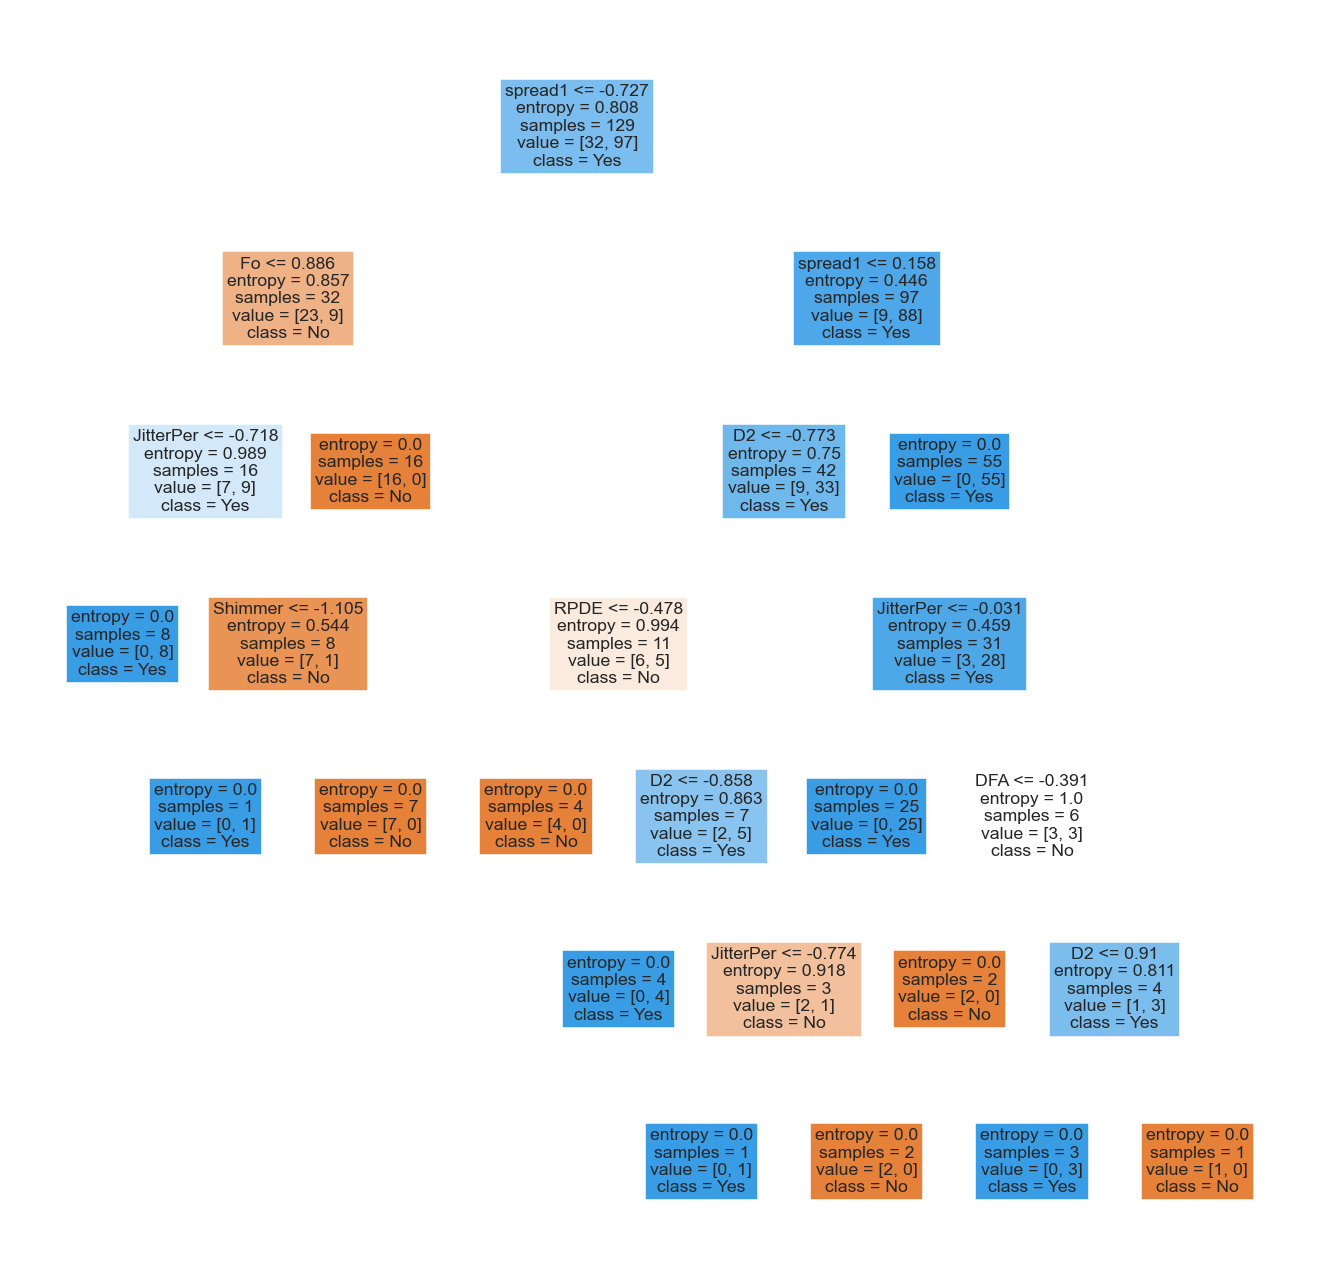

In [55]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(scaled_X_Train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

<h5> Reducing over fitting (Regularization) </h5>

In [56]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(scaled_X_Train, y_Train)
print(dTreeR.score(scaled_X_Train, y_Train))
print(dTreeR.score(scaled_X_Test, y_Test))

0.9457364341085271
0.9285714285714286


In [57]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(scaled_X_Train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

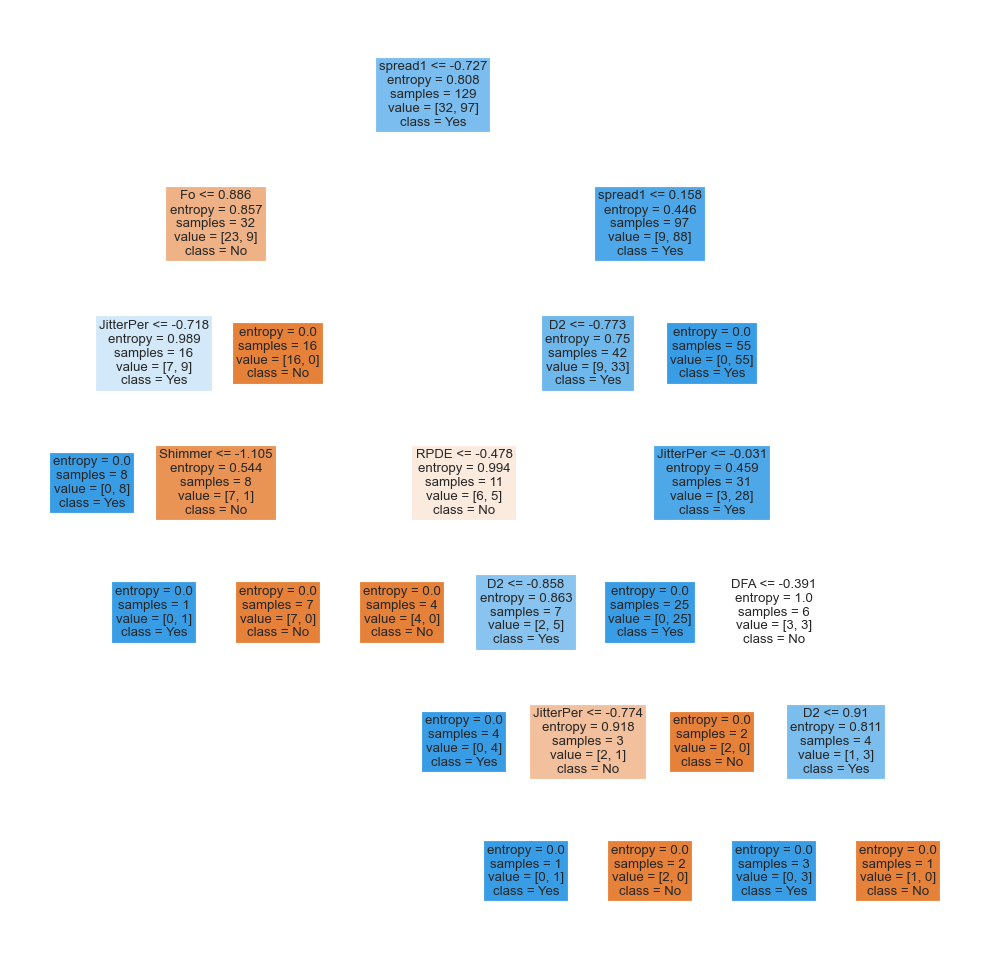

In [58]:
# If graphviz doesn't work, we can use plot_tree method from sklearn.tree

fn = list(scaled_X_Train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

In [59]:
y_pred = dTreeR.predict(scaled_X_Test)
y_predictProb = dTreeR.predict_proba(scaled_X_Test)
print(classification_report(y_Test,y_pred))
print(accuracy_score(y_Test,y_pred))
print(confusion_matrix(y_Test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.95      0.95      0.95        42

    accuracy                           0.93        56
   macro avg       0.90      0.90      0.90        56
weighted avg       0.93      0.93      0.93        56

0.9285714285714286
[[12  2]
 [ 2 40]]


<h5> Model Evaluation - Decision Trees </h5>
From the above classification report, accuracy score and confusion matrix we can deduce the following:

***Model Performance***
<li>Accuracy is 92.85% </li>
<li>Precision is 86% </li>
<li>Recall is 86% </li>

<h3> 14. MODEL BUILDING - SVM (Support Vector Machine)  </h3>

<h5> SVM Model building (using Linear Kernel) </h5>

In [60]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data using Linear kernel
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(scaled_X_Train, y_Train)

# Predicting using the SVM Modelfor test data
prediction = svc_model .predict(scaled_X_Test)

In [61]:
# check the accuracy on the training and testing set
print(svc_model.score(scaled_X_Train, y_Train))
print(svc_model.score(scaled_X_Test, y_Test))

0.8837209302325582
0.875


In [62]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_Test))

Confusion Matrix:
 [[ 7  0]
 [ 7 42]]


<h5> Model Evaluation - SVM using Linear Kernel </h5>
From the above classification report, accuracy score and confusion matrix we can deduce the following:

***Model Performance***
<li>Accuracy is 87.5% </li>
<li>Precision is 100% </li>
<li>Recall is 50% </li>

<h5> SVM Model building using RBF (Radial Basis Function) Kernel </h5>

In [63]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data using RBF kernel
svc_model = SVC(kernel='rbf')
svc_model.fit(scaled_X_Train, y_Train)

# Predicting using the SVM Modelfor test data
prediction = svc_model.predict(scaled_X_Test)

In [64]:
# check the accuracy on the training and testing set
print(svc_model.score(scaled_X_Train, y_Train))
print(svc_model.score(scaled_X_Test, y_Test))

0.9147286821705426
0.8928571428571429


In [65]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_Test))

Confusion Matrix:
 [[ 8  0]
 [ 6 42]]


<h5> Model Evaluation - SVM using Linear Kernel </h5>
From the above classification report, accuracy score and confusion matrix we can deduce the following:

***Model Performance***
<li>Accuracy is 89.3% </li>
<li>Precision is 100% </li>
<li>Recall is 57% </li>

<h3> 15. META-CLASSIFIER TECHNIQUE  </h3>

Stacking is an ensemble learning technique which is used to combine the predictions of diverse classification models into one single model also known as the meta-classifier.
All the individual models are trained separately on the complete training data set and fine-tuned to achieve a greater accuracy. The bias and variance trade-off is taken care off for each model. The final model, also known as the meta-classifier is fed either the class labels predicted by the base models or the predicted probabilities for each class label. The meta-classifier is then trained based on the outputs given by the base models. In stacking, a new model is trained based on the predictions made by the previous models.

>lr 0.824 (0.080)
>knn 0.920 (0.071)
>cart 0.825 (0.097)
>svm 0.904 (0.061)
>bayes 0.745 (0.093)


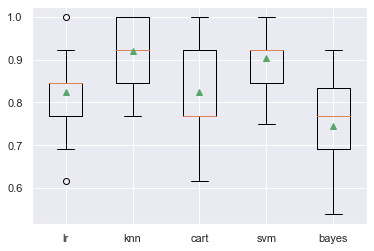

In [66]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
#	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return scaled_X_Train, y_Train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<h5>A box-and-whisker plot shows the distribution accuracy scores for each model. Clearly, KNN and SVM  perform better on average than LR, Decision Trees and Bayes for the Parkinson's Voice dataset. </h5>

We will now combine the above five models into a single ensemble model using stacking.

We will use a logistic regression model toas a meta-model to combine the predictions from each of the separate five models.

The get_stacking() function below defines the StackingClassifier model by first defining a list of tuples for the five base models, then defining the logistic regression meta-model to combine the predictions from the base models using 5-fold cross-validation.

>lr 0.824 (0.080)
>knn 0.920 (0.071)
>cart 0.835 (0.082)
>svm 0.904 (0.061)
>bayes 0.745 (0.093)
>stacking 0.904 (0.063)


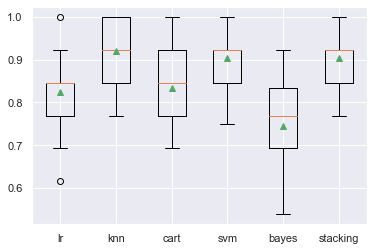

In [67]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
#	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return scaled_X_Train, y_Train
 
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<h5>A box plot plotted shows the distribution of model classification accuracies.

We observe that the mean and median accuracy for the KNN Model is still better than the stacking model and sits slightly at a higher value. </h5>

<h3> 16. MODEL BUILDING - Random Forest Classifier </h3>

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(scaled_X_Train, y_Train)
y_pred = rfcl.predict(scaled_X_Test)
rfcl.score(scaled_X_Test , y_Test)

0.8928571428571429

In [69]:
y_pred = rfcl.predict(scaled_X_Test)
y_predictProb = rfcl.predict_proba(scaled_X_Test)
print(classification_report(y_Test,y_pred))
print(accuracy_score(y_Test,y_pred))
print(confusion_matrix(y_Test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.89      0.98      0.93        42

    accuracy                           0.89        56
   macro avg       0.90      0.81      0.84        56
weighted avg       0.89      0.89      0.89        56

0.8928571428571429
[[ 9  5]
 [ 1 41]]


<h5> Model Evaluation - Random Forest Classifier </h5>
From the above classification report, accuracy score and confusion matrix we can deduce the following:

***Model Performance***
<li>Accuracy is 89.28% </li>
<li>Precision is 71.42% </li>
<li>Recall is 83.33% </li>

In [70]:
count_misclassified = (y_Test != y_pred).sum()
print('Misclassified samples in Random Forest: {}'.format(count_misclassified))

Misclassified samples in Random Forest: 6


<h3> 17. MODEL BUILDING - BAGGING </h3>

In [71]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=None, n_estimators=50, max_samples=.7)
bgcl = bgcl.fit(scaled_X_Train, y_Train)
y_pred = bgcl.predict(scaled_X_Test)
bgcl.score(scaled_X_Test , y_Test)

0.875

In [72]:
y_pred = bgcl.predict(scaled_X_Test)
y_predictProb = bgcl.predict_proba(scaled_X_Test)
print(classification_report(y_Test,y_pred))
print(accuracy_score(y_Test,y_pred))
print(confusion_matrix(y_Test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.91      0.93      0.92        42

    accuracy                           0.88        56
   macro avg       0.84      0.82      0.83        56
weighted avg       0.87      0.88      0.87        56

0.875
[[10  4]
 [ 3 39]]


<h5> Model Evaluation - Bagging </h5>
From the above classification report, accuracy score and confusion matrix we can deduce the following:

***Model Performance***
<li>Accuracy is 89.28% </li>
<li>Precision is 78.57% </li>
<li>Recall is 78.57% </li>

In [73]:
count_misclassified = (y_Test != y_pred).sum()
print('Misclassified samples in Bagging: {}'.format(count_misclassified))

Misclassified samples in Bagging: 7


<h3> 18. MODEL BUILDING - ADABOOSTING </h3>

In [74]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 50)
abcl = abcl.fit(scaled_X_Train,y_Train)
y_pred = abcl.predict(scaled_X_Test)
abcl.score(scaled_X_Test , y_Test)

0.875

In [75]:
y_pred = abcl.predict(scaled_X_Test)
y_predictProb = abcl.predict_proba(scaled_X_Test)
print(classification_report(y_Test,y_pred))
print(accuracy_score(y_Test,y_pred))
print(confusion_matrix(y_Test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.89      0.95      0.92        42

    accuracy                           0.88        56
   macro avg       0.85      0.80      0.82        56
weighted avg       0.87      0.88      0.87        56

0.875
[[ 9  5]
 [ 2 40]]


<h5> Model Evaluation - ADABoosting </h5>
From the above classification report, accuracy score and confusion matrix we can deduce the following:

***Model Performance***
<li>Accuracy is 87.5% </li>
<li>Precision is 64.28% </li>
<li>Recall is 81.81% </li>

In [76]:
count_misclassified = (y_Test != y_pred).sum()
print('Misclassified samples in AdaBoost: {}'.format(count_misclassified))

Misclassified samples in AdaBoost: 7


<h3> 19. MODEL BUILDING - GRADIENT BOOSTING </h3>

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(scaled_X_Train,y_Train)
y_pred = gbcl.predict(scaled_X_Test)
gbcl.score(scaled_X_Test , y_Test)

0.9107142857142857

In [78]:
y_pred = gbcl.predict(scaled_X_Test)
y_predictProb = gbcl.predict_proba(scaled_X_Test)
print(classification_report(y_Test,y_pred))
print(accuracy_score(y_Test,y_pred))
print(confusion_matrix(y_Test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.93      0.95      0.94        42

    accuracy                           0.91        56
   macro avg       0.89      0.87      0.88        56
weighted avg       0.91      0.91      0.91        56

0.9107142857142857
[[11  3]
 [ 2 40]]


<h5> Model Evaluation - Gradient Boosting </h5>
From the above classification report, accuracy score and confusion matrix we can deduce the following:

***Model Performance***
<li>Accuracy is 91.07% </li>
<li>Precision is 78.57% </li>
<li>Recall is 84.61% </li>

In [79]:
count_misclassified = (y_Test != y_pred).sum()
print('Misclassified samples in Gradient Boost: {}'.format(count_misclassified))

Misclassified samples in Gradient Boost: 5


<h5>Of all the Ensembel Models,  Gradient Boost algorithm gives the maximum accuracy for the Parkinson Voice dataset.</h5>

<h3> 20. MODEL COMPARISON </h3>

LR: 0.821154 (0.086024)
KNN: 0.937821 (0.057767)
NB: 0.744872 (0.075728)
SVM: 0.899359 (0.084462)
CART: 0.867949 (0.069763)
RF: 0.875641 (0.098984)
BG: 0.867949 (0.097983)
ADA: 0.860256 (0.107944)
GB: 0.883333 (0.071715)


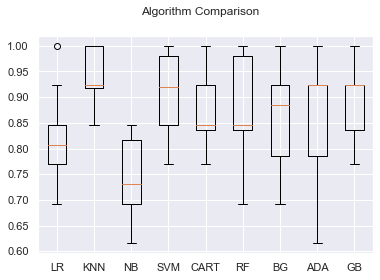

In [80]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('BG', BaggingClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<h5> All the Regression, Classification and Ensemble Models were evaluated as above and KNN (93.7%) and SVM (89.9%) scored relatively better than other models. </h5>